In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


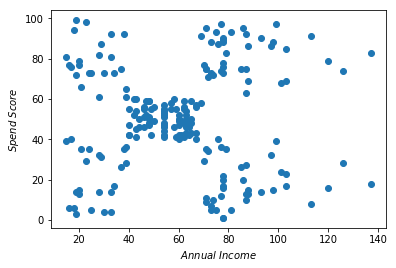

In [3]:
X = dataset.iloc[:,3:5].values

plt.xlabel('$Annual$ $Income$')
plt.ylabel('$Spend$ $Score$')
plt.scatter(X[:,0] ,X[:,1])
plt.show()


In [4]:
def dist(A,B):
    return ((A[0]-B[0])**2 + (A[1] - B[1])**2)**0.5

def equals(C1,C2):
    for i in range(5):
        for j in range(2):
            if C1[i,j]!=C2[i,j]:
                return False
    return True
def cluster_KNN(X,k,C):
    P = np.zeros(len(X[:,0]))
    for i in range(len(X[:,0])):
        
        L=[]
        for j in range(k):
            
            L.append([dist(X[i,:],C[j,:]) , j+1])
        L.sort()
        
        P[i] = L[0][1]
    C_new,L = (centroid(X,P,k))
    
    if equals(C_new,C):
        return C,L
    else:
        return cluster_KNN(X,k,C_new)
        

            
        
def centroid(X,P,k):
    L=[np.zeros([len(X[:,0]),2]),np.zeros([len(X[:,0]),2]),np.zeros([len(X[:,0]),2]),np.zeros([len(X[:,0]),2]),np.zeros([len(X[:,0]),2])]
    C = np.zeros([k,2])
    count = [0,0,0,0,0]
    for i in range(len(P)):
        for j in range(1,k+1):
            if P[i]==j:
                L[j-1][i,:] = X[i,:]
                count[j-1]+=1
    
    
        
    for i in range(k):
        A = L[i]
        
        k1 = np.sum(A[:,0])/count[i]
        k2 = np.sum(A[:,1])/count[i]
        C[i,:] = np.array([k1,k2])
    return C,L

def plot(L,k,C):
    color = ['green' , 'red' , 'blue' , 'yellow' , 'orange']
    for i in range(k):
       plt.scatter(L[i][:,0],L[i][:,1],c=color[i] , label = i+1)
    plt.scatter(0,0,c='white')       
    plt.scatter(C[:,0] , C[:,1] , c = 'black' , s=100 , label='C')
    plt.xlabel('$Annual$ $Income$')
    plt.ylabel('$Spend$ $Score$')
    plt.legend()
    plt.show()

Clustered Plot


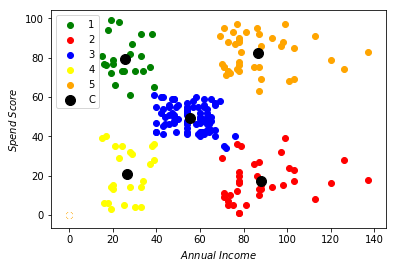

In [6]:
k=5
C = np.array([[19,72],[81,5],[60,50],[15,39],[113,91]] , dtype = np.float64)
C,L = cluster_KNN(X,k,C)
print("Clustered Plot")
plot(L,k,C)